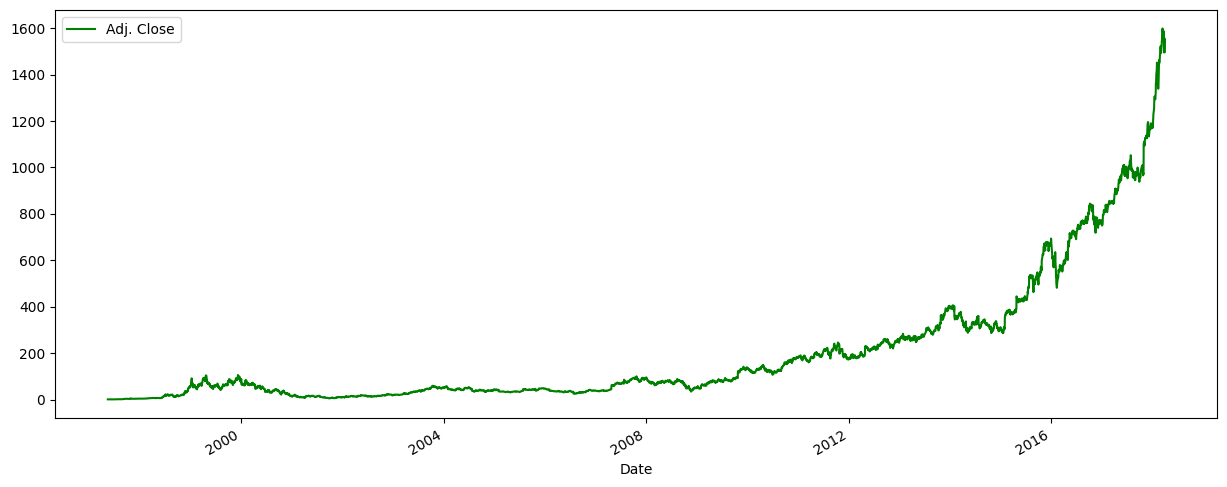

<Axes: xlabel='Date'>

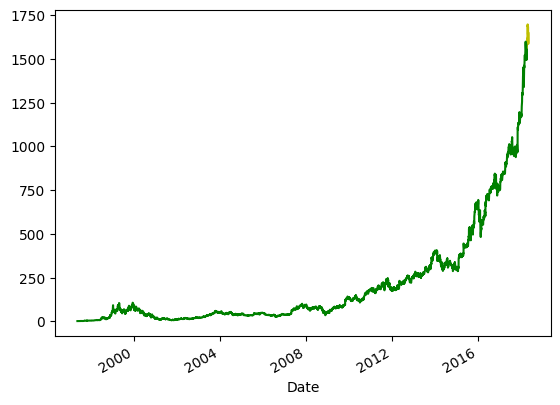

In [7]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression

quandl.ApiConfig.api_key = '48nKxYEKmGE4xAKosHvd'

df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]
df.head()

df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show()

forecast= 30
df['Prediction']= df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], axis= 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)

dates = pd.date_range(start="2018-03-28" , end= "2018-04-26")
plt.plot(dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')
# plt.plot(X, y)
